In [47]:
import pandas as pd
import numpy as np
import pylab as pl
from numpy import fft

### Fourier Analysis and Extrapolation : Finding trends and periodicity in MTA Turnstile Data (2 ave Subway)

In [48]:
data = pd.read_csv("UES_jf2ave_2017.csv")
print data.STATION.unique()
print data.shape
data.head()

IOError: File UES_jf2ave_2017.csv does not exist

In [45]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


In [38]:
data = data.groupby("DATE").sum()
data = data.reset_index()
data.head()

,DATE,Unnamed: 0,ENTRIES,NEW_ENTRIES
0,1/1/2017,27676,780586938,21050
1,1/10/2017,24399,936822379,45551
2,1/11/2017,24507,937049678,43892
3,1/12/2017,24615,937381632,45778
4,1/13/2017,24723,937666856,46852


In [39]:
x = np.array(data.NEW_ENTRIES)

In [26]:
n_predict = 10 #number of days to predict

extrapolation = fourierExtrapolation(x, n_predict)

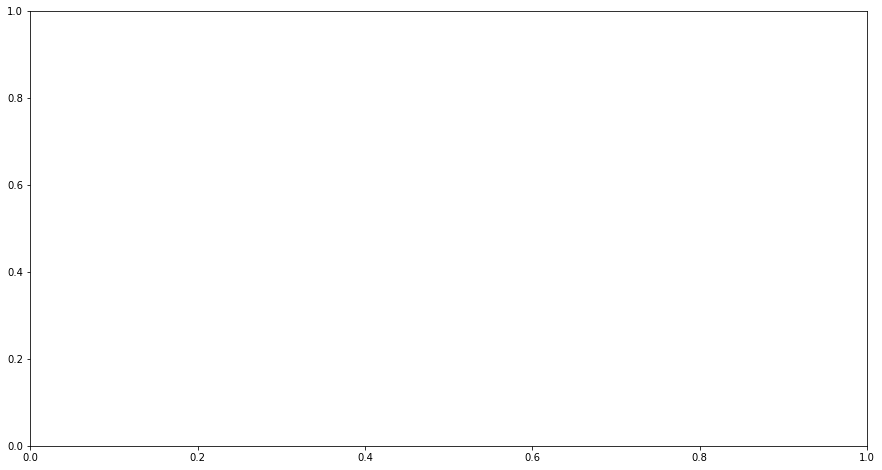

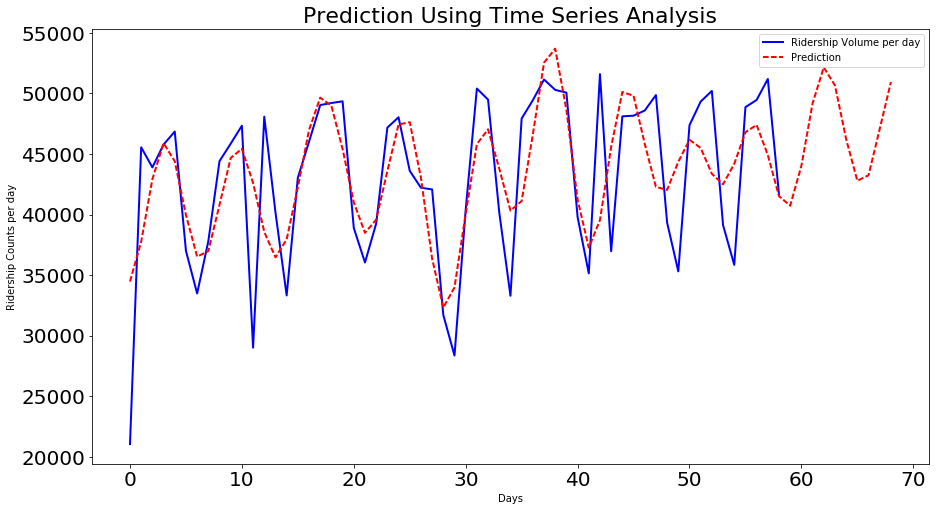

In [42]:

pl.figure(figsize=(15,8))
pl.plot(np.arange(0, x.size), x, 'b', label = 'Ridership Volume per day', linewidth = 2)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r--',linewidth = 2, label = 'Prediction')
pl.legend()
pl.title("Prediction Using Time Series Analysis", size = 22)
pl.xlabel("Days")
pl.ylabel("Ridership Counts per day")
pl.xticks(fontsize = 20)
pl.yticks(fontsize = 20)
# pl.xlim(np.linspace(0,1500,200))
pl.show()

In [46]:
x

array([    0.,   568.,  1920., ...,  5692.,  2835.,  3589.])